In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
random.seed(1852026)

In [3]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [4]:
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


In [5]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [6]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [7]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


In [8]:
n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 10 # size of the hidden layer, # neurons, this is just for the moment to have some example

# Question 1. (Full minimization)

### MLP network

In [9]:
W = np.random.randn(N,n)# * 0.01
bias = np.random.randn(N,1)# * 0.01
V = np.random.randn(n_y,N)# * 0.01

ro=10**-5 #10-5 unti, 10-3
sigma=1

In [10]:
print(V,'\n')
print(W,'\n')
print(bias)

[[-0.60446122 -0.83597189  0.94298383  0.18033755  0.00575146  0.74942736
   0.38933945 -2.53362494  0.67799139 -0.74468698]] 

[[ 0.0384173  -0.16621174]
 [-0.21337008 -0.53706811]
 [ 0.10001704  1.11654611]
 [-0.65481153 -0.25741979]
 [ 0.93068674 -0.30206671]
 [ 0.09178695  0.21497542]
 [ 1.44402459  1.64680637]
 [ 2.21743138 -1.37623628]
 [-0.504781    0.20063479]
 [ 1.27764591 -1.28233899]] 

[[ 0.01412181]
 [-0.98397158]
 [-0.3282652 ]
 [ 0.79647618]
 [-0.90091504]
 [-0.11719903]
 [ 1.05312351]
 [ 0.83835753]
 [-0.76598962]
 [-0.10691058]]


In [11]:
a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)
omega

matrix([[-0.60446122,  0.0384173 , -0.16621174,  0.01412181],
        [-0.83597189, -0.21337008, -0.53706811, -0.98397158],
        [ 0.94298383,  0.10001704,  1.11654611, -0.3282652 ],
        [ 0.18033755, -0.65481153, -0.25741979,  0.79647618],
        [ 0.00575146,  0.93068674, -0.30206671, -0.90091504],
        [ 0.74942736,  0.09178695,  0.21497542, -0.11719903],
        [ 0.38933945,  1.44402459,  1.64680637,  1.05312351],
        [-2.53362494,  2.21743138, -1.37623628,  0.83835753],
        [ 0.67799139, -0.504781  ,  0.20063479, -0.76598962],
        [-0.74468698,  1.27764591, -1.28233899, -0.10691058]])

In [12]:
X=X_train
true=Y_train

a=pd.DataFrame(V.T)
a[2]=W[:,0]
a[3]=W[:,1]
a[4]=bias
omega=np.matrix(a)


def second_norm(omega):
    return np.linalg.norm(omega)**2   #,2)#**2

def activation_f(t,sigma=1):
    return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)


def predict(omega,X):  

    
    V=omega.T[:N].reshape(1,N)
    W=omega.T[N:N+2*N].reshape(N,2)
    
    bias=omega.T[N+2*N:].reshape(N,1)
    
    t=W.dot(X)-bias

    
    predicted_values=V.dot(activation_f(t,sigma))
    return predicted_values#, W,bias




def reg_tr_error(omega,functionArgs):

    X=functionArgs[0]
    true=functionArgs[1]
    
    predicted=predict(omega,X)
  
    
    err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
    err_all=err.dot(err.T)

    
    P=X.shape[1]
    return ((err_all)/(2*P)+ro*second_norm(omega)).item(0)

In [13]:
reg_tr_error(omega.flatten(),[X_train,Y_train])

1.2202412906790294

In [14]:
res=minimize(reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
print(res['fun'],'\n',res['x'])

0.018834011241638943 
 [-2.74354243 -0.92108904 -5.26521746  1.47915809 -4.02944515 -4.34337737
  3.46794095 -3.76515125  0.94140741 -0.97350549  1.95150714 -0.15797135
  1.06492365 -0.31089391 -0.48014026  0.71051436 -0.1132908   3.13018804
  0.15761869 -4.00072559  3.29528522  0.1552156   0.57257953 -3.22410426
 -0.38778039  0.24694909  0.676094   -0.1584259  -3.7188133   0.03700351
 -1.28560942  0.34155881  0.48486815 -0.78220797 -3.9114031  -7.06029093
 -3.71390434  3.52473986 -3.20235451 -2.07216422]


In [15]:
print(reg_tr_error(res['x'].flatten(),[X_train,Y_train]))
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test]))

0.018834011241638943
0.029091260314009708
0.02939123264448793


In [16]:
print(reg_tr_error(res['x'].flatten(),[X_validate,Y_validate]))
print(reg_tr_error(res['x'].flatten(),[X_test,Y_test]))


0.029091260314009708
0.02939123264448793


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [17]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed

In [18]:
def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[0]

K=5   # SO 4 folds for training 1-validation for testing; they switch every time
cv_data=np.concatenate((data_train,data_validate))
np.random.shuffle(cv_data)
indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
folds=[]



X=X_train
W
V
bias
true=Y_train

ro=10**-5 #10-5 unti, 10-3
sigma=1
P=cv_data.shape[0]



val_err_dict={}
train_err_dict={}

data=cv_data.copy()
#CHOSEN OMEGA?

omega=res['x']
for i in range(len(indices)):
    cv_data=data
    if i<4:
        l=[i for i in range(indices[i],indices[i+1])]
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:indices[i+1],:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        
        
        X_train = np.transpose(np.matrix(train_cv)[:,0:2])
        Y_train = np.transpose(np.matrix(train_cv)[:,2:])
        X_validate = np.transpose(validate_cv[:,0:2])
        Y_validate = np.transpose(validate_cv[:,2:])

        train_err_dict[i]=mse(Y_train,predict(omega.flatten(),X_train))
        val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))
        
        reg_tr_error(res['x'].flatten(),[X_train,Y_train])
    else:
        #for the last element
        l=list([i for i in range(indices[i],255)])
        #(VALIDATION fold) for testing
        validate_cv=cv_data[indices[i]:,:]
        
        #train folds together for training
        df=pd.DataFrame(cv_data)
        train_cv=df.drop(df.index[l])
        
        val_err_dict[i]=mse(Y_validate,predict(omega,X_validate))
        train_err_dict[i]=mse(Y_train,predict(omega.flatten(),X_train))


In [19]:
#average rmse
print('!-----------V--A-L--I--D--A--T--I---O--N------R-M-S-E----!')
print(sum(val_err_dict.values())/len(val_err_dict))

print('!---------------T---R---A----I---N----------R-M-S-E------!')
print(sum(train_err_dict.values())/len(train_err_dict))

!-----------V--A-L--I--D--A--T--I---O--N------R-M-S-E----!
2.2509199660065695
!---------------T---R---A----I---N----------R-M-S-E------!
6.8611841621541645


In [20]:




def plotting(): 

    fig = plt.figure(figsize=(40,30))
    ax = plt.axes(projection='3d')

    xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = predict(res['x'],XY.T)
    Z=Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
#    fig.savefig('results_11_MLP')
    plt.grid()
    return X.shape,Y.shape,Z.shape,X,Y,Z.T
 

((3321,),
 (3321,),
 (3321,),
 array([-2., -2., -2., ...,  2.,  2.,  2.]),
 array([-1.  , -0.95, -0.9 , ...,  0.9 ,  0.95,  1.  ]),
 array([5.17570063, 4.98216119, 4.79149478, ..., 3.83924128, 4.30414581,
        4.85248399]))

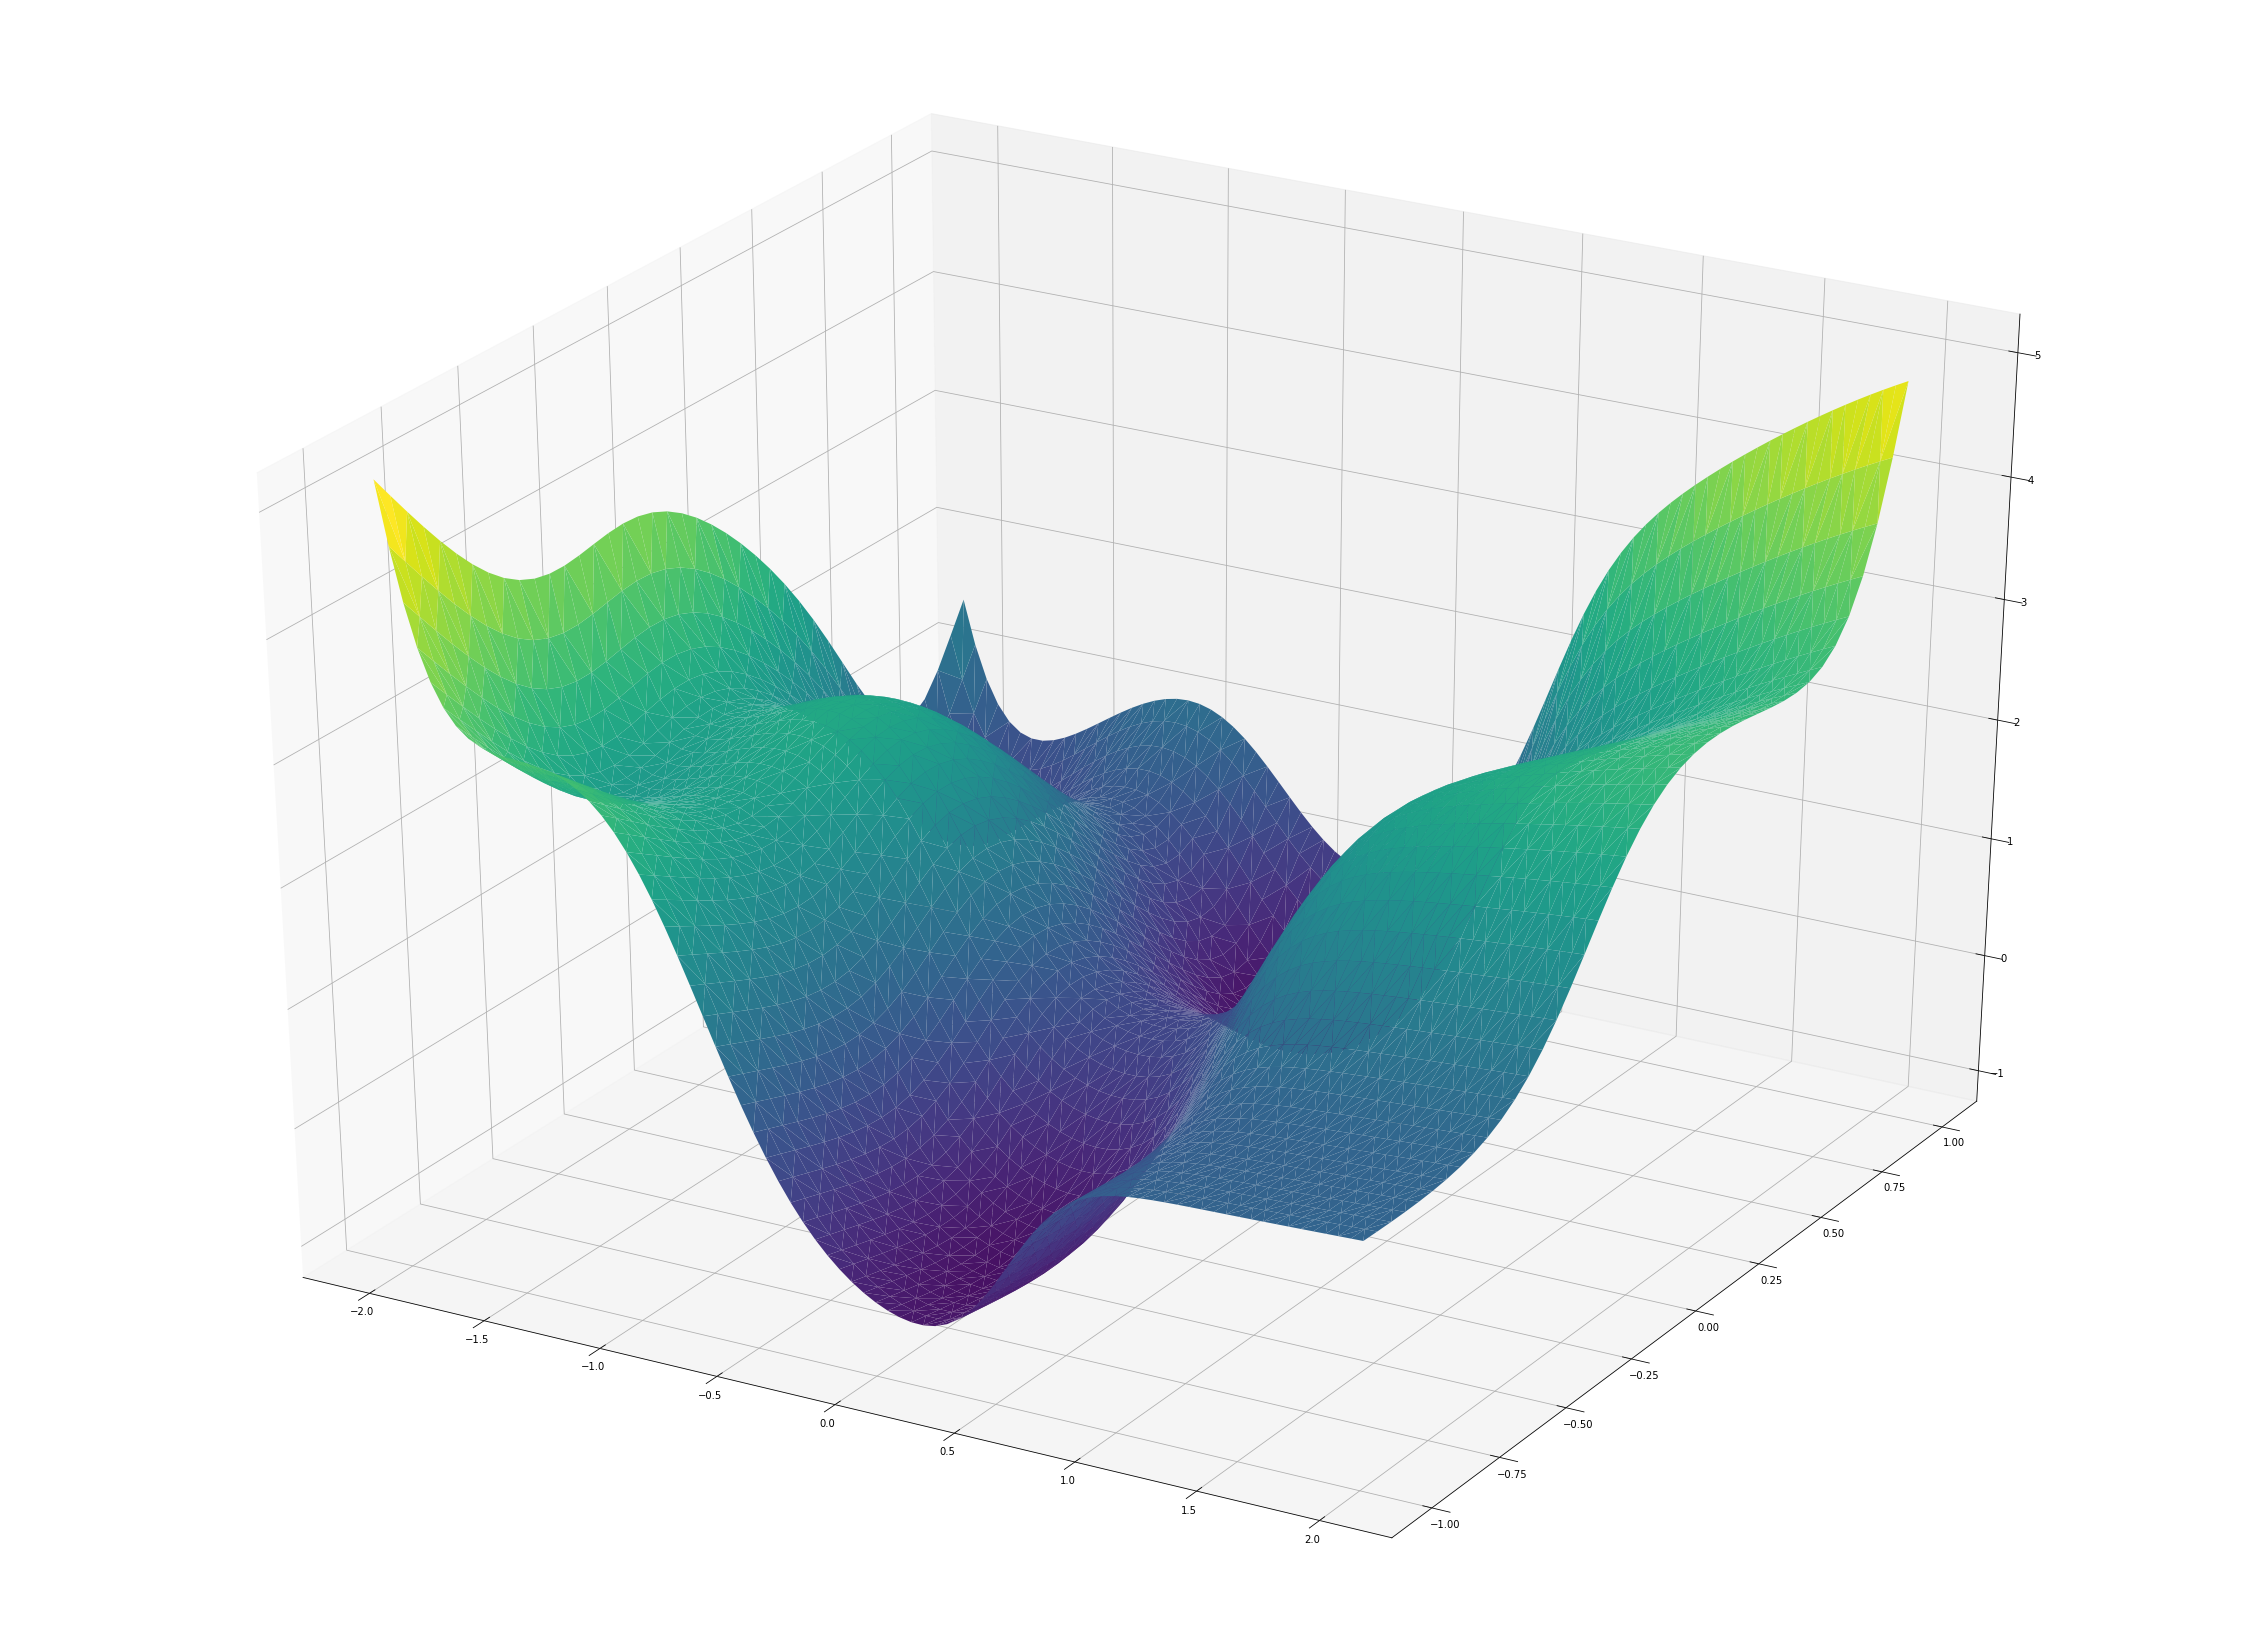

In [21]:
plotting()

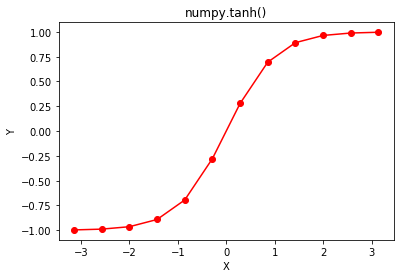

In [22]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 